Can run in jupyter notebook, shows both images

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def upsize(grid, multiplier):
    length = len(grid) * multiplier
    newgrid = np.zeros((length, length, len(grid[0][0])))
    for i in range(length):
        for j in range(length):
            newgrid[i, j] = grid[i//multiplier, j//multiplier]
    return newgrid.astype(np.uint8)

def unitconv(eff, imgarr):
    finalcolor = [0, 0, 0]
    for i in range(grid_size):
        for j in range(grid_size):
            finalcolor += imgarr[i,j] * eff[i,j]
    return finalcolor

def conv(eff, imgarr):
    imgarraylocal = np.copy(imgarr)
    for i in range(semilength, h-semilength):
        for j in range(semilength, w-semilength):
            imgarraylocal[i][j] = unitconv(eff, imgarr[i-semilength:i+semilength+1, j-semilength:j+semilength+1])
    return imgarraylocal


image_path = "pixelimg/pixel bird.png" #pick image
img = Image.open(image_path)
s = 64
output_s = 256

img_resized = img.resize((s, s), Image.NEAREST)
image_array = np.array(img_resized.convert("RGB"))
h = image_array.shape[0]
w = image_array.shape[1]


grid_size = 5 #adjustable

center = grid_size // 2
semilength = grid_size - center - 1
effect_unnorm = np.zeros((grid_size, grid_size))

option = 3
if option == 1:
    for i in range(grid_size): #gaussian
        for j in range(grid_size):
            effect_unnorm[i, j] = 3**(-((i-center)**2) - ((j-center)**2))
elif option == 2: #uniform
    effect_unnorm = np.ones((grid_size, grid_size))
elif option == 3: #custom, change according to grid_size
    effect_unnorm = np.array([
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 5, 0, 0],
        [1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]
    ], dtype=np.uint8)


def norm(unnormeffect):
    return unnormeffect / np.sum(unnormeffect)

effect = norm(effect_unnorm)




final_image_array = conv(effect, image_array).astype(np.uint8)
reconstructed_image = Image.fromarray(np.concatenate((final_image_array, image_array)))
sharp_image = reconstructed_image.resize((output_s, 2*output_s) ,Image.NEAREST)

sharp_image.show()
sharp_image.save("outputimgs.png")



Need to run as python file as this contains user interaction

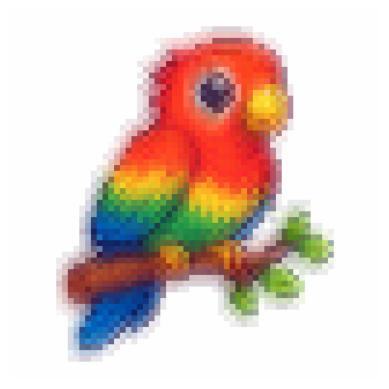

In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def upsize(grid, multiplier):
    length = len(grid) * multiplier
    newgrid = np.zeros((length, length, len(grid[0][0])))
    for i in range(length):
        for j in range(length):
            newgrid[i, j] = grid[i//multiplier, j//multiplier]
    return newgrid.astype(np.uint8)

def unitconv(eff, imgarr):
    finalcolor = [0, 0, 0]
    for i in range(grid_size):
        for j in range(grid_size):
            finalcolor += imgarr[i,j] * eff[i,j]
    return finalcolor

def conv(eff, imgarr):
    imgarraylocal = np.copy(imgarr)
    for i in range(semilength, h-semilength):
        for j in range(semilength, w-semilength):
            imgarraylocal[i][j] = unitconv(eff, imgarr[i-semilength:i+semilength+1, j-semilength:j+semilength+1])
    return imgarraylocal


image_path = "pixelimg/pixel bird.png" #pick image
img = Image.open(image_path)
s = 64
output_s = 256

img_resized = img.resize((s, s), Image.NEAREST)
image_array = np.array(img_resized.convert("RGB"))
h = image_array.shape[0]
w = image_array.shape[1]


grid_size = 5 #adjustable

center = grid_size // 2
semilength = grid_size - center - 1
effect_unnorm = np.zeros((grid_size, grid_size))

option = 3
if option == 1:
    for i in range(grid_size): #gaussian
        for j in range(grid_size):
            effect_unnorm[i, j] = 3**(-((i-center)**2) - ((j-center)**2))
elif option == 2: #uniform
    effect_unnorm = np.ones((grid_size, grid_size))
elif option == 3: #custom, change according to grid_size
    effect_unnorm = np.array([
        [0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 4, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 1]
    ], dtype=np.uint8)


def norm(unnormeffect):
    return unnormeffect / np.sum(unnormeffect)

effect = norm(effect_unnorm)




final_image_array = conv(effect, image_array).astype(np.uint8)
imgf = Image.fromarray((final_image_array)).resize((output_s, output_s), Image.NEAREST)
imgorig = Image.fromarray((image_array)).resize((output_s, output_s), Image.NEAREST)
imgf.show()

imgarrf = np.array(imgf)
imgarrorig = np.array(imgorig)

fig, ax = plt.subplots()
img_display = ax.imshow(imgarrf)
ax.axis("off")

def pressed(event):
    img_display.set_data(imgarrf)
    fig.canvas.draw_idle()
    
def released(event):
    img_display.set_data(imgarrorig)
    fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("button_press_event", pressed)
fig.canvas.mpl_connect("button_release_event", released)

plt.show()


In [ ]:
from PIL import Image
import numpy as np
import random



# Load the image
image_path = "mario pixel.jpg"
image = Image.open(image_path)

# Convert the image to RGB format (if not already)
image = image.convert("RGB")

# Convert the image to a NumPy array
image_array = np.array(image)

# Each pixel is represented as a vector [R, G, B]
# print("Image shape (Height x Width x Channels):", image_array.shape)
# print("Pixel at (0, 0):", image_array[254, 168])  # Example: random pixel

# image_array = np.zeros((5, 5, 3), dtype=np.uint8)

# for i in range(5):
#     for j in range(5):
#         # Assign random RGB values to each pixel
#         image_array[i, j] = [random.choice([0, 255]) for _ in range(3)]


h = image_array.shape[0]
w = image_array.shape[1]

for i in range(h):
    for j in range(w):
        p = random.random()
        if p < 0.5:
            image_array[i, j] = [0, 0, 0]

grid_size = 25
center = grid_size // 2
semilength = grid_size - center - 1

effect_unnorm = np.zeros((grid_size, grid_size))
for i in range(grid_size):
    for j in range(grid_size):
        effect_unnorm[i, j] = 3**(-((i-center)**2) - ((j-center)**2))

def norm(unnormeffect):
    return unnormeffect / np.sum(unnormeffect)

effect = norm(effect_unnorm)


def unitconv(eff, imgarr):
    finalcolor = [0, 0, 0]
    for i in range(grid_size):
        for j in range(grid_size):
            # print("i,j", i, j)
            # print("imgarr[i,j]", imgarr[i,j])
            # print("size of imgarr", imgarr.shape)
            # print("eff[i,j]", eff[i,j])
            finalcolor += imgarr[i,j] * eff[i,j]
    return finalcolor

def conv(eff, imgarr):
    imgarraylocal = np.copy(imgarr)
    for i in range(semilength, h-semilength):
        for j in range(semilength, w-semilength):
            imgarraylocal[i][j] = unitconv(eff, imgarr[i-semilength:i+semilength+1, j-semilength:j+semilength+1])
    return imgarraylocal

# print("imgarraylocal", image_array)
# print("cnov", conv(effect, image_array))

# Convert the NumPy array back to an image
reconstructed_image = Image.fromarray(conv(effect, image_array).astype(np.uint8))

# Resize the image to make the pixels appear sharp
sharp_image = reconstructed_image.resize((2*w, 2*h) ,Image.NEAREST)

# Display the sharp image
sharp_image.show()


IndexError: index 9 is out of bounds for axis 1 with size 9

Randomly removes some pixels

In [4]:
# Load the image
image_path = "mario pixel.jpg"
image = Image.open(image_path)

# Convert the image to RGB format (if not already)
image = image.convert("RGB")

# Convert the image to a NumPy array
image_array = np.array(image)

h = image_array.shape[0]
w = image_array.shape[1]


for i in range(h):
    for j in range(w):
        p = random.random()
        if p < 0.5:
            image_array[i, j] = [0, 0, 0]


# # Convert the NumPy array back to an image
# reconstructed_image = Image.fromarray(conv(effect, image_array).astype(np.uint8))

# Convert the NumPy array back to an image
reconstructed_image = Image.fromarray(image_array)

# Resize the image to make the pixels appear sharp
sharp_image = reconstructed_image.resize((w, h) ,Image.NEAREST)

# Display the sharp image
sharp_image.show()
